<a href="https://colab.research.google.com/github/Eyad-dev/UK_Train_Rides/blob/main/(Forecasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ================================
#   FORECASTING & VISUALIZATION
# ================================

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("Depi project railway (2).csv")

#Set "Date of Journey" column into date&time format
df["Date of Journey"] = pd.to_datetime(df["Date of Journey"], format="%m/%d/%Y")

#  Rides prediction
# ---------------------------------

#Sorting dates
daily_rides = df.groupby("Date of Journey").size().reset_index(name="Rides")

# Create a numpy array and name it "DayIndex"
daily_rides["DayIndex"] = np.arange(len(daily_rides))

#set variable X to a 2D array and store days indexing in it
#so 0->29
X = daily_rides["DayIndex"].values.reshape(-1, 1)

#Holds the number of rides
y = daily_rides["Rides"].values


# Train the model
ride_model = LinearRegression()
ride_model.fit(X, y)

# Forecast for next 30 days
future_days = 30
last_index = daily_rides["DayIndex"].iloc[-1]
future_indices = np.arange(last_index + 1, last_index + future_days + 1).reshape(-1, 1)

#Get predicition for the 30 days
ride_forecast = ride_model.predict(future_indices)

# Create forecast dataframe
future_dates = pd.date_range(
    start=daily_rides["Date of Journey"].iloc[-1] + pd.Timedelta(days=1),
    periods=future_days
)

forecast_rides_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Rides": ride_forecast
})

print("Predicted rides for the following 30 days")
print(forecast_rides_df)

Predicted rides for the following 30 days
         Date  Predicted Rides
0  2024-04-03       218.749234
1  2024-04-04       218.071502
2  2024-04-05       217.393769
3  2024-04-06       216.716037
4  2024-04-07       216.038304
5  2024-04-08       215.360572
6  2024-04-09       214.682840
7  2024-04-10       214.005107
8  2024-04-11       213.327375
9  2024-04-12       212.649642
10 2024-04-13       211.971910
11 2024-04-14       211.294178
12 2024-04-15       210.616445
13 2024-04-16       209.938713
14 2024-04-17       209.260981
15 2024-04-18       208.583248
16 2024-04-19       207.905516
17 2024-04-20       207.227783
18 2024-04-21       206.550051
19 2024-04-22       205.872319
20 2024-04-23       205.194586
21 2024-04-24       204.516854
22 2024-04-25       203.839122
23 2024-04-26       203.161389
24 2024-04-27       202.483657
25 2024-04-28       201.805924
26 2024-04-29       201.128192
27 2024-04-30       200.450460
28 2024-05-01       199.772727
29 2024-05-02       199.0949

In [8]:
# 2) REVENUE PER DAY (Historical)
daily_revenue = df.groupby("Date of Journey")["Revenue"].sum().reset_index()

# Prepare model for revenue
daily_revenue["DayIndex"] = np.arange(len(daily_revenue)).reshape(-1)

X_rev = daily_revenue["DayIndex"].values.reshape(-1, 1)
y_rev = daily_revenue["Revenue"].values

rev_model = LinearRegression()
rev_model.fit(X_rev, y_rev)

# Forecast next 30 days revenue
rev_forecast = rev_model.predict(future_indices)

forecast_revenue_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted Revenue": rev_forecast
})

print("\n=== Forecasted Revenue for Next Month ===")
print(forecast_revenue_df)


=== Forecasted Revenue for Next Month ===
         Date  Predicted Revenue
0  2024-04-03        4749.462972
1  2024-04-04        4729.367143
2  2024-04-05        4709.271314
3  2024-04-06        4689.175485
4  2024-04-07        4669.079656
5  2024-04-08        4648.983827
6  2024-04-09        4628.887998
7  2024-04-10        4608.792169
8  2024-04-11        4588.696340
9  2024-04-12        4568.600511
10 2024-04-13        4548.504682
11 2024-04-14        4528.408853
12 2024-04-15        4508.313023
13 2024-04-16        4488.217194
14 2024-04-17        4468.121365
15 2024-04-18        4448.025536
16 2024-04-19        4427.929707
17 2024-04-20        4407.833878
18 2024-04-21        4387.738049
19 2024-04-22        4367.642220
20 2024-04-23        4347.546391
21 2024-04-24        4327.450562
22 2024-04-25        4307.354733
23 2024-04-26        4287.258904
24 2024-04-27        4267.163075
25 2024-04-28        4247.067245
26 2024-04-29        4226.971416
27 2024-04-30        4206.875587


In [4]:
# 3) TICKET CLASS DEMAND
ticket_class_counts = df["Ticket Class"].value_counts()

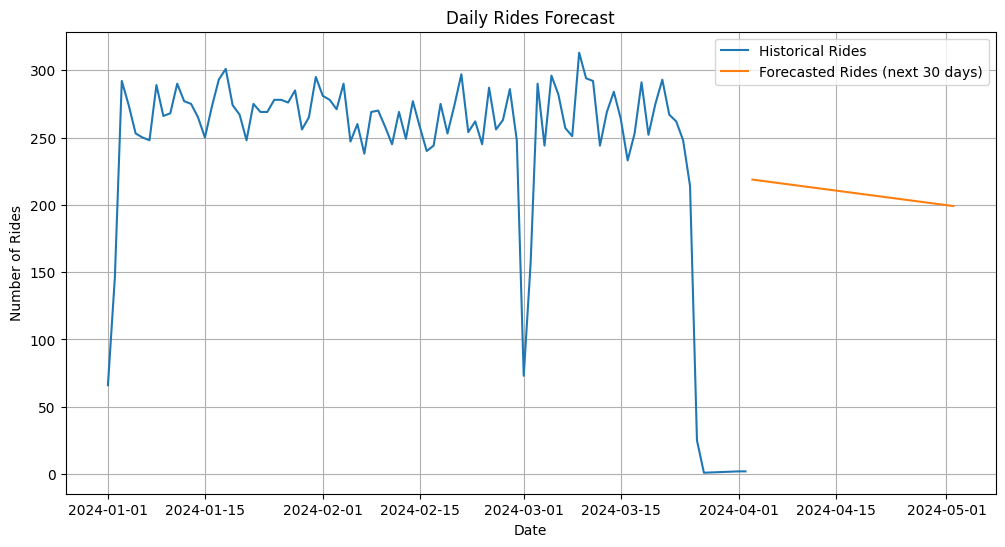

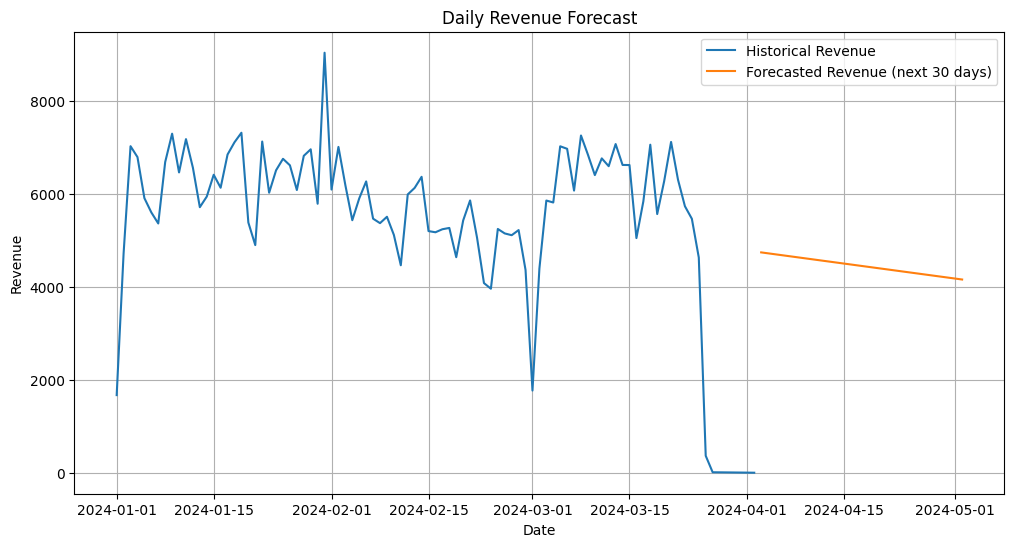

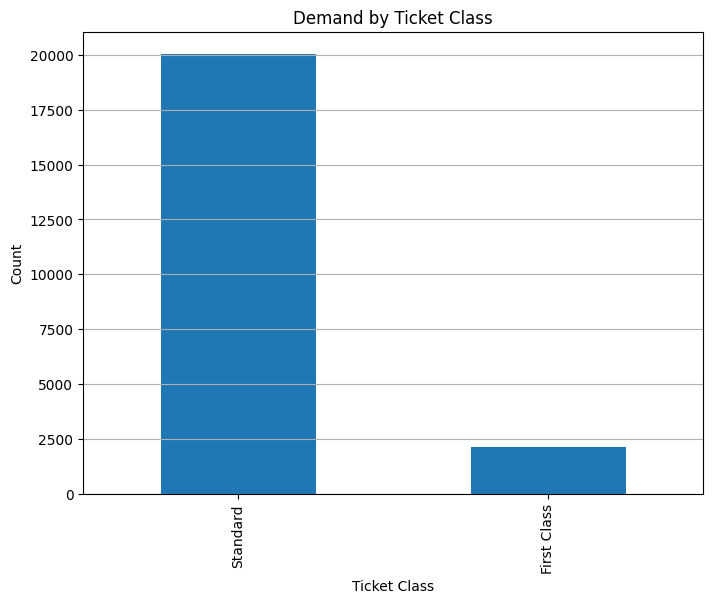

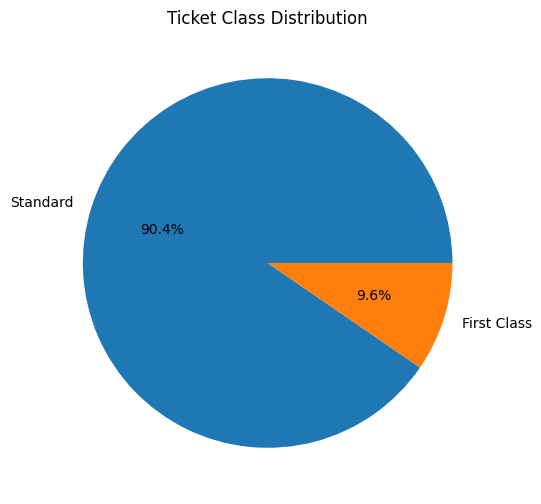

In [10]:
# 4) VISUALIZATION PLOTS

plt.figure(figsize=(12,6))
plt.plot(daily_rides["Date of Journey"], daily_rides["Rides"], label="Historical Rides")
plt.plot(forecast_rides_df["Date"], forecast_rides_df["Predicted Rides"], label="Forecasted Rides (next 30 days)")
plt.title("Daily Rides Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Rides")
plt.legend()
plt.grid(True)
plt.show()
print()

plt.figure(figsize=(12,6))
plt.plot(daily_revenue["Date of Journey"], daily_revenue["Revenue"], label="Historical Revenue")
plt.plot(forecast_revenue_df["Date"], forecast_revenue_df["Predicted Revenue"], label="Forecasted Revenue (next 30 days)")
plt.title("Daily Revenue Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()
print()

plt.figure(figsize=(8,6))
ticket_class_counts.plot(kind='bar')
plt.title("Demand by Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.grid(axis='y')
plt.show()
print()

plt.figure(figsize=(6,6))
ticket_class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Ticket Class Distribution")
plt.ylabel("")
plt.show()
